<a href="https://colab.research.google.com/github/zaimhusnun/Visualization/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime

In [ ]:
df = pd.read_csv('telco_customer_churn.csv')
df2 = pd.read_csv('apartment_data.csv')

df3 = sns.load_dataset("penguins")
df3 = df3.dropna().reset_index(drop = True)

#### Soal
1. Data: Telco Customer Churn (df)

    a. Gambarlah histogram dari kolom 'Tenure', dan pisahkan dengan warna berdasarkan Churn. Namun, pada visualisasi tersebut, tambahkan pula 'Density Plot' di atas Histogram sehingga hasil akhir visualisasinya menjadi seperti yang terlihat pada Slide.

    b. Buatlah Stacked Bar Chart yang memperlihatkan rasio dari kolom 'InternetService' terhadap customer-customer yang Churn dan Non Churn.
    
    c. Jawablah pertanyaan ini: bagi customer yang Churn, kebanyakan dari mereka memiliki InternetService tipe apa?

2. Data: Apartment Data (df2)

    a. Buatlah sebuah bar plot di mana sumbu-x adalah kolom `Bathroom`, dan sumbu-y adalah kolom `AnnualPrice` (yang dirata-ratakan menurut kolom `Bathroom`). Jadi, kita ingin melihat, berapa `AnnualPrice` rata-rata untuk apartement yang memiliki 0, 1, 2, 3 `Bathroom`.
    
    b. Jawablah pertanyaan ini: apartment dengan berapa kamar mandi yang memiliki rata-rata Annual Price paling tinggi?

3. Data: Penguins (df3)

    a. Buatlah visualisasi scatterplot menggunakan Sub Plots (materi Day 8). Terdapat 2 Sub Plots yang akan dibuat, dengan ketentuan berikut:
    - Terdapat 2 scatterplot. Posisi subplots adalah 1 kolom dan 2 baris. Artinya, kedua scatterplot yang akan kita gambar akan saling tumpuk-menumpuk (ada yang di atas, ada yang di bawah).
    - Scatterplot pertama: sumbu-x: `body_mass_g`, sumbu-y: `flipper_length_mm`
    - Scatterplot kedua: sumbu-x: `body_mass_g`, sumbu-y: `bill_length_mm`
    - Scatterplot diberi warna berdasarkan kolom `island`. Terserah menggunakan color palette apa pun.
    - Gantilah nama dari masing-masing sumbu sehingga lebih menarik dan enak dibaca (tidak di-set default)
    - Berilah judul dari visualisasi yang dibuat (bebas, asal jangan kosong)
    
   b. Jawablah pertanyaan berikut: Variabel `body_mass_g` lebih baik digunakan untuk memprediksi variabel `flipper_length_mm`, atau `bill_length_mm`?

# **VISUALISASI**

In [ ]:
df3

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Histogram dari kolom 'Tenure', dan dipisahkan dengan warna berdasarkan kolom "Churn"

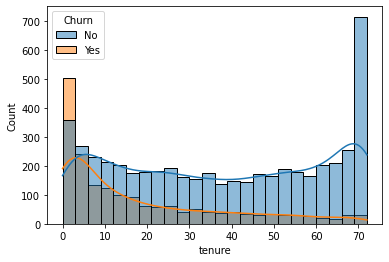

In [ ]:
plot = plt.figure()
ax = sns.histplot(data = df, x='tenure', hue = 'Churn', binwidth = 3, kde=True)
plt.show()

##Stacked Bar Chart yang memperlihatkan rasio dari kolom 'InternetService' terhadap customer-customer yang Churn dan Non Churn.

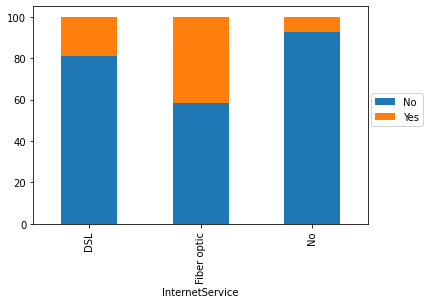

In [ ]:
### Step 1: Buat dulu crosstab seperti ini

pd.crosstab(df['InternetService'], df['Churn']).apply(lambda x: x*100/x.sum(), axis = 1)
pd.crosstab(df['InternetService'], df['Churn']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar', stacked = True)
plt.legend(bbox_to_anchor=(1.01, 0.6), loc=2,  borderaxespad=0)
plt.show()

## Interpretasi:
Bagi customer yang Churn, paling banyak mereka menggunakan internet "FIBER OPTIC" (berdasarkan grafik yang sudah diolah dibawah).

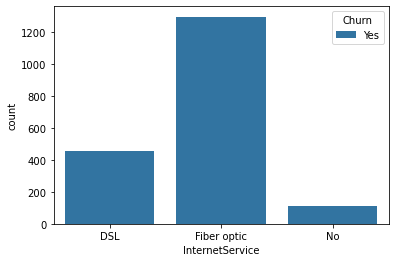

In [ ]:
yes=df[df["Churn"]=="Yes"]
fig = plt.figure()
ax = sns.countplot(data = yes, x='InternetService', hue = yes["Churn"])
plt.show()

## Bar plot
Dimana sumbu-x adalah kolom "Bathroom", dan sumbu-y adalah kolom "AnnualPrice" (yang dirata-ratakan menurut kolom Bathroom). Jadi, kita ingin melihat, berapa AnnualPrice rata-rata untuk apartement yang memiliki 0, 1, 2, 3 Bathroom.

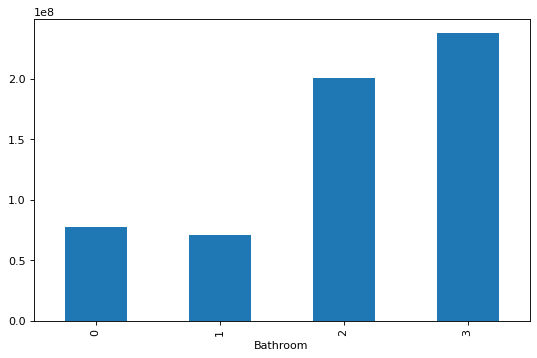

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
df2.groupby(['Bathroom'])['AnnualPrice'].mean().plot(kind = 'bar')
plt.show()

## Interpretasi


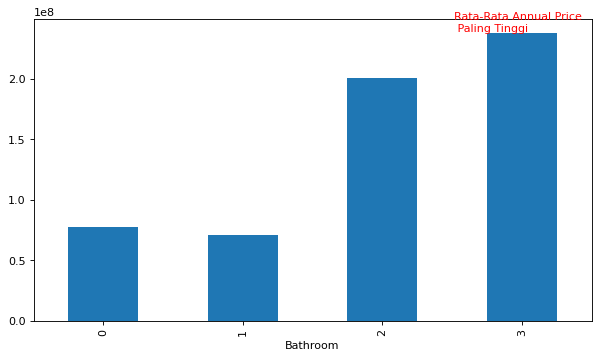

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(9, 5), dpi=80, facecolor='w', edgecolor='k')
df2.groupby(['Bathroom'])['AnnualPrice'].mean().plot(kind = 'bar')
plt.text(1.05, 1.136, 'Rata-Rata Annual Price \n Paling Tinggi', transform=fig.transFigure, color='red')
plt.show()

### Rata-rata harga Annual Price paling tinggi adalah pada unit apartement dengan jumlah 3 kamar mandi.

In [ ]:
df3

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Visualisasi scatterplot menggunakan Sub Plots

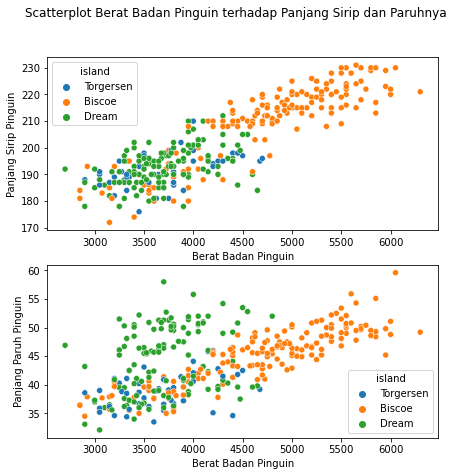

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(2, figsize=(7,7))
fig.suptitle('Scatterplot Berat Badan Pinguin terhadap Panjang Sirip dan Paruhnya')
fig = plt.figure()
a=sns.scatterplot(data = df3, x='body_mass_g', y = 'flipper_length_mm', hue = 'island', ax=axs[0])
a.set_xlabel("Berat Badan Pinguin")
a.set_ylabel("Panjang Sirip Pinguin")
b=sns.scatterplot(data = df3, x='body_mass_g', y = 'bill_length_mm', hue = 'island', ax=axs[1])
b.set_xlabel("Berat Badan Pinguin")
b.set_ylabel("Panjang Paruh Pinguin")
plt.show()

## Interpretasi

Berdasarkan scatterplot diatas, dapat dilihat bahwa pola scatterplot yang lebih rapat adalah scatter pada variabel body mass dengan panjang sirip pinguin. Pola tersebut mengindikasikan bahwa residual dari pemodelan tersebut memiliki nilai yang kecil, artinya variabel berat badan lebih akurat untuk memprediksi variabel panjang sirip.